# Q 1a

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import random

In [2]:
#Creating a graph
G = nx.DiGraph()
#Reading the graph file

try:#trying to open the network file
    with open('rogetnetwork.txt', 'r') as file:
        #Reading lines of the file
        for line in file:
            #getting all nodes in a line
            nodes = line.strip().split()
            #First node of every line is a sourse node
            source_node = int(nodes[0])
            #Getting neighbors of a sourse node and adding to the graph
            for target_node in map(int, nodes[1:]):
                G.add_edge(source_node, target_node)
except:
    print("Error: File not found!")
    G.add_edges_from((node, neighbor) for neighbor in neighbors)

In [3]:
#weakly connected components of the graph
weakly_components = nx.weakly_connected_components(G)
#greatest weakly connected component of the graph
greatest_component = max(weakly_components, key=len)
#creating greatest weakly connected subgraph
Gc_sub = G.subgraph(greatest_component)

#selecting a random node
seedValue = 230418075
random.seed(seedValue)
node = random.choice(list(Gc_sub.nodes()))

# Initialize sets to store nodes and nodes already used
nodes = set([node])  # Set to store nodes of the induced subgraph
usedNodes = set([node])  # Set to store nodes already included

# Print the randomly selected starting node
print("Random node: ", node)

# Checking the size of induced subgraph
while len(nodes) < 80:
    
    # Getting the neighbors of the current node and storing them iin a list
    neighbors = list(Gc_sub.neighbors(node))
    
    # Add the neighbors to the set of nodes 
    nodes.update(neighbors)
    
    # Check if adding the neighbors would exceed the desired size
    if (len(neighbors) + len(nodes) > 80):
        break
    
    # Find the neighbor with the highest degree among the unvisited neighbors
    max_degree = 0
    next_node = None
    for neighbor in neighbors:
        degree = Gc_sub.degree(neighbor)
        if (degree > max_degree and neighbor not in usedNodes):
            max_degree = degree
            next_node = neighbor
    
    # If no unvisited neighbors are found, break the loop
    if next_node is None:
        break
    
    # Add the next node with the highest degree to the set of nodes
    nodes.add(next_node)
    
    # Update the current node and mark it as used
    node = next_node
    usedNodes.add(node)

# Create a subgraph from the selected nodes
subgraph = Gc_sub.subgraph(nodes)

# Print the number of nodes and the nodes in the subgraph
print("No. of nodes", subgraph.number_of_nodes())
print("Nodes in our subgraph", subgraph.nodes)

Random node:  254
No. of nodes 70
Nodes in our subgraph [256, 129, 138, 140, 653, 655, 656, 272, 658, 659, 660, 147, 664, 282, 666, 668, 286, 673, 674, 290, 163, 165, 38, 167, 294, 680, 808, 174, 689, 50, 177, 179, 437, 438, 696, 313, 698, 697, 700, 318, 703, 965, 840, 201, 202, 714, 847, 208, 210, 862, 863, 224, 865, 866, 482, 234, 747, 876, 108, 618, 619, 368, 254, 248, 249, 250, 252, 253, 638, 255]


# Q 1b

In [4]:
#creating a copy of the subgraph
new_subgraph = subgraph.to_undirected()

#Bisecting subgraph into two equal communitieis using KL algorithm
comm1, comm2 = nx.community.kernighan_lin_bisection(new_subgraph, partition=None, max_iter=10, weight='weight', seed=240035400)

print("Community 1:", comm1)
print("Size of Community 1:", len(comm1))
print("\nCommunity 2:", comm2)
print("Siize of Community 2:", len(comm2))

#Finding the cut size of the bisection
cut=nx.cut_size(new_subgraph, list(comm1), list(comm2))
print("\nCut size:",cut)

Community 1: {138, 272, 658, 147, 664, 282, 666, 668, 673, 290, 674, 165, 38, 167, 294, 808, 680, 689, 50, 179, 177, 696, 697, 698, 313, 700, 703, 965, 840, 865, 618, 619, 876, 368, 638}
Size of Community 1: 35

Community 2: {256, 129, 140, 653, 655, 656, 659, 660, 286, 163, 174, 437, 438, 318, 201, 202, 714, 847, 208, 210, 862, 863, 224, 482, 866, 234, 747, 108, 248, 249, 250, 252, 253, 254, 255}
Siize of Community 2: 35

Cut size: 29


# Explanation

The KL algorithm is dividing the induced subgraph into two parts of the equal size. This is a best possible bisection. 
The cut size is 29. This is not a good cut size because there are 29 connections between the two bisections. It means, more then 80% of nodes in one bisection has connections to the other bisection. It has lost a lot of information. 
This make sense, because for the induced sub-graph we are selecting nodes from the network with high degrees and graph is very well connected.

# Q 1c

In [5]:
import networkx as nx
#detecting communites using Girvan-Newman algorithm
communities = nx.community.girvan_newman(new_subgraph)
#creating iterator of communities
next_partition = next(iter(communities))

# Sort the nodes within each community and create a tuple of communities
communities = tuple(sorted(comm) for comm in next_partition)



# Calculate cut size between community 1 and community 2
cut_size = sum(1 for a, b in new_subgraph.edges() if ((a in communities[0] and b in communities[1]) or (a in communities[1] and b in communities[0])))
print(f"\nCut size between community 1 and community 2: {cut_size}")



Cut size between community 1 and community 2: 2


While using the Girvan-Newman algorithm, we are getting cut size of 2, The Girvan-Newman algorithm remove the nodes with highest centrality. The nodes with high centrality are acting as a bridge or intermediaries in the network.
The KL algorithm gives best partitions of equal sizes. The Girvan-Newman algorithm bisect the network into more meaningful communities.

# Q1d

In [6]:
#creating a dictionary of the labels of the nodes
word_dict = {}
with open('rogetlabels.txt', 'r') as file:
    for line in file:
        # Split the line into key and value
        key, value = line.strip().split(' ', 1)
        # Convert key to integer
        key = int(key)
        # Remove the quotation marks from the value
        value = value.strip('"')
        # Add key-value pair to the dictionary
        word_dict[key] = value
community_lists = []
for comm in communities:
    community_lists.append(list(comm))
    
community1 = community_lists[0]
community2 = community_lists[1]
print("Nodes of community 1")
for i in community1:
    print(i,word_dict[i])
    
print("\nNodes of community 2")
for i in community2:
    print(i,word_dict[i])    

Nodes of community 1
224 obliquity
234 circumjacence
252 curvature
253 straightness
254 circularity
255 convolution
256 rotundity
286 deviation
318 circuition

Nodes of community 2
38 decrease
50 incoherence
108 repetition
129 oldness
138 lateness
140 intempestivity
147 cessation
163 impotence
165 weakness
167 destruction
174 unproductiveness
177 inertness
179 moderation
201 expansion
202 contraction
208 shortness
210 thinness
248 amorphism
249 symmetry
250 distortion
272 quiescence
282 slowness
290 regression
294 recession
313 descent
368 death
437 colour
438 achromatism
482 impossibility
618 irresolution
619 obstinacy
638 avoidance
653 waste
655 insufficiency
656 redundance
658 unimportance
659 utility
660 inutility
664 badness
666 imperfection
668 uncleanness
673 improvement
674 deterioration
680 danger
689 non-preparation
696 inaction
697 activity
698 inactivity
700 leisure
703 fatigue
714 unskilfulness
747 failure
808 stealing
840 insensibility
847 painfulness
862 beauty
863 uglin

# Explanatipn

Division 1 contains nodes related to geometric properties and shapes, such as curvature, straightness, circularity, and rotundity. While division 2 consists of nodes related to abstract concepts and states, such as qualities, attributes and emotions for example decrease, repetition, oldness, weakness, and destruction.
This is also supporting the fact that  Girvan-Newman algorithm divide the network into more meaningful communities

# Q1e

In [14]:
txt_data = 'rogetnetwork.txt'
G = nx.DiGraph()

rogetnetwork = open(txt_data,'r')
for i in rogetnetwork:
    a = list(map(int, i.strip().split(' ')))
    node = a[0]
    neighbors = a[1:]
    G.add_edges_from((node, neighbor) for neighbor in neighbors)
         

In [15]:
import random

# Set the parameters for generating random numbers
num_numbers = 10  # Number of random numbers you want
min_value = 300      # Minimum value of the random numbers
max_value = 1000    # Maximum value of the random numbers

# Generate a list of random numbers
random_numbers = [random.randint(min_value, max_value) for _ in range(num_numbers)]



In [16]:
for i in range(10):
    Gc = G.copy()
    
    n=random_numbers[i]
    
    
    # Get the list of nodes from the graph
    nodes_list = list(Gc.nodes())


    # Select n random nodes
    seedValue = 230418075
    random.seed(seedValue)
    random_nodes = random.sample(nodes_list, n)
    

    # Remove the selected nodes from the graph
    Gc.remove_nodes_from(random_nodes)
    
    # Find weakly connected components
    weakly_connected_components = list(nx.weakly_connected_components(Gc))

    # Find the greatest weakly connected component based on the number of nodes
    greatest_component = max(weakly_connected_components, key=len)

    # Create a subgraph from the greatest component
    greatest_subgraph = Gc.subgraph(greatest_component)
    size_of_greatest_subgraph = greatest_subgraph.number_of_nodes()
    print("After removing ",n," nodes, fraction of nodes present in largest connected component:",size_of_greatest_subgraph/(G.number_of_nodes()-n))
    
#     # Plot the greatest_subgraph
#     plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
#     nx.draw(greatest_subgraph, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
#     plt.title("Greatest Subgraph")
#     plt.show()

    
    # Calculate degrees of all nodes
    degrees = dict(nx.degree(greatest_subgraph))
    total_degree_sum = sum(degrees.values())
    sum_of_squared_values = sum(value ** 2 for value in degrees.values())
    
    
    avg_degree_sum=total_degree_sum/len(degrees)
    avg_sq_degree_sum=sum_of_squared_values/len(degrees)
    if avg_degree_sum == 0:
        continue;
    else:
        c = avg_sq_degree_sum/avg_degree_sum
    
    #Checking  Molloy-Reed criterion
    if(c>2):#[2]
        print("According to  Molloy-Reed criterion network is robust against random failures")
    else:
        print("According to  Molloy-Reed criterion network is not-robust against random failures") 
        

After removing  791  nodes, fraction of nodes present in largest connected component: 0.5525114155251142
According to  Molloy-Reed criterion network is robust against random failures
After removing  752  nodes, fraction of nodes present in largest connected component: 0.6744186046511628
According to  Molloy-Reed criterion network is robust against random failures
After removing  853  nodes, fraction of nodes present in largest connected component: 0.4012738853503185
According to  Molloy-Reed criterion network is robust against random failures
After removing  697  nodes, fraction of nodes present in largest connected component: 0.7284345047923323
According to  Molloy-Reed criterion network is robust against random failures
After removing  635  nodes, fraction of nodes present in largest connected component: 0.824
According to  Molloy-Reed criterion network is robust against random failures
After removing  991  nodes, fraction of nodes present in largest connected component: 0.1052631578

# Explanation

Most of the time network is robust against random failures. When we remove a random number of nodes from the graph, a good number of nodes remain connected to each other making a gaint componet.
This is also evdent from Molley-Read criterian[2].
According to the Molley-Read crteria a network is robust if<br>
$\frac{\langle k^2 \rangle}{\langle k \rangle} \geq 2$
<br>
otherwise network is not robust against random failures



# Q2a

In [10]:
import networkx as nx
from scipy.integrate import odeint

# Parameters
N = 300  
k = 4    
p_rewire = 0.05
seed=230418075

# Generate Watts-Strogatz network
network = nx.watts_strogatz_graph(N, k, p_rewire, seed)

# Check if the generated network matches the specifications
print("Number of nodes:", network.number_of_nodes())
print("Number of edges:", network.number_of_edges())
print("Average clustering coefficient:", nx.average_clustering(network))

Number of nodes: 300
Number of edges: 600
Average clustering coefficient: 0.44077777777777766


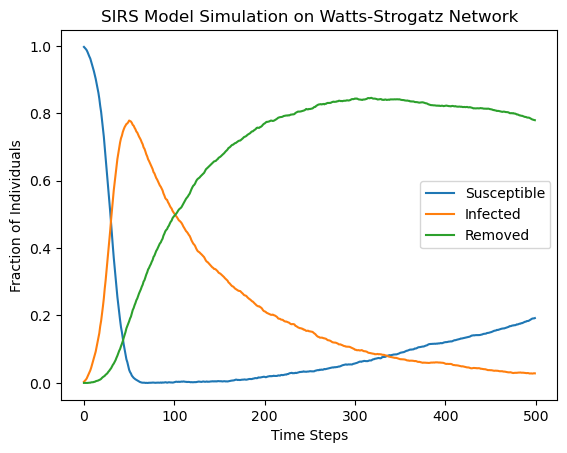

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
seed=230418075

# Function to initialize the SIRS model
def initialize_sirs_model(network, initial_infected_node):
    states = {node: 'S' for node in network.nodes()}  # All nodes are initially susceptible
    states[initial_infected_node] = 'I'  # Set the initial infected node
    return states

# Function to simulate the SIRS model
def sirs_simulation(network, states, alpha, beta, gamma, delta, duration):
    num_nodes = len(network.nodes())
    num_susceptible = []
    num_infected = []
    num_removed = []

    for _ in range(duration):
        susceptible_count = sum(1 for node, state in states.items() if state == 'S')
        infected_count = sum(1 for node, state in states.items() if state == 'I')
        removed_count = sum(1 for node, state in states.items() if state == 'R')

        # Store current counts
        num_susceptible.append(susceptible_count / num_nodes)
        num_infected.append(infected_count / num_nodes)
        num_removed.append(removed_count / num_nodes)

        new_states = states.copy()
        for node in network.nodes():
            if states[node] == 'S':
                num_neighbors_infected = sum(1 for neighbor in network.neighbors(node) if states[neighbor] == 'I')
                if np.random.random() < alpha * num_neighbors_infected:
                    new_states[node] = 'I'  # Susceptible becomes infected
            elif states[node] == 'I':
                if np.random.random() < beta:
                    new_states[node] = 'R'  # Infected becomes removed
            elif states[node] == 'R':
                if np.random.random() < delta:
                    new_states[node] = 'S'  # Removed becomes susceptible

        states = new_states

    return num_susceptible, num_infected, num_removed

# Parameters
N = 300  
k = 4    
p_rewire = 0.05  

alpha = 0.2  # Probability that a susceptible person becomes infected if one of the neighbors is infected
beta = 0.01  # Probability that an infected person becomes removed
gamma = 0.005  # Probability that an infected person becomes susceptible again
delta = 0.001  # Probability that a removed person becomes susceptible again

duration = 500  # Simulation duration
repetitions = 10  # Number of repetitions

#lists to store results
avg_susceptible = np.zeros(duration)
avg_infected = np.zeros(duration)
avg_removed = np.zeros(duration)


for _ in range(repetitions):
    # Generate Watts-Strogatz network
    network = nx.watts_strogatz_graph(N, k, p_rewire,seed)
    # Initialize SIRS model with one infected node
    initial_infected_node = np.random.choice(network.nodes())
    #Initializing states of all the nodes
    states = initialize_sirs_model(network, initial_infected_node)
    # Simulate SIRS model
    s, i, r = sirs_simulation(network, states, alpha, beta, gamma, delta, duration)
    # Summing results
    avg_susceptible += np.array(s)
    avg_infected += np.array(i)
    avg_removed += np.array(r)
    seed+=1

# Average over repetitions
avg_susceptible /= repetitions
avg_infected /= repetitions
avg_removed /= repetitions

# Plotting
plt.plot(avg_susceptible, label='Susceptible')
plt.plot(avg_infected, label='Infected')
plt.plot(avg_removed, label='Removed')
plt.xlabel('Time Steps')
plt.ylabel('Fraction of Individuals')
plt.title('SIRS Model Simulation on Watts-Strogatz Network')
plt.legend()
plt.show()
#[1]

# Q 2b

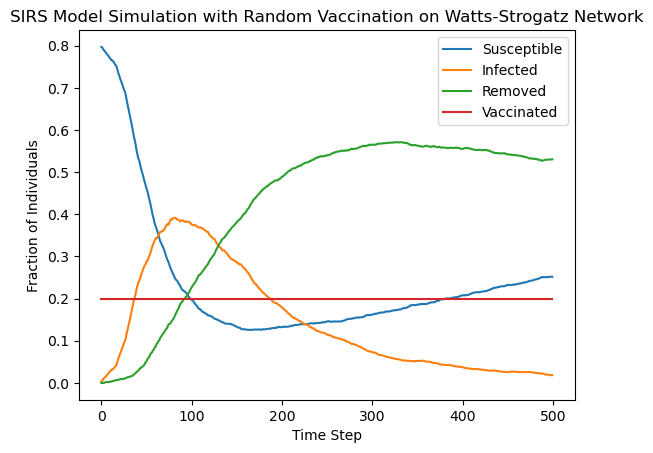

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to initialize the SIRS model with random vaccination
def initialize_sirs_model(network, initial_infected_node, vaccination_rate):
    states = {node: 'S' for node in network.nodes()}  # All nodes are initially susceptible
    num_vaccinated = int(vaccination_rate * len(network.nodes()))  # Calculate number of vaccinated nodes
    vaccinated_nodes = np.random.choice(list(network.nodes()), num_vaccinated, replace=False)  # Select random nodes for vaccination
    for node in vaccinated_nodes:
        states[node] = 'V'  # Set the state of vaccinated nodes to 'V'
    states[initial_infected_node] = 'I'  # Set the initial infected node
    return states

# Function to simulate the SIRS model
def sirs_simulation(network, states, alpha, beta, gamma, delta, duration):
    num_nodes = len(network.nodes())
    num_susceptible = []
    num_infected = []
    num_removed = []
    num_vaccinated = []

    for _ in range(duration):
        susceptible_count = sum(1 for node, state in states.items() if state == 'S')
        infected_count = sum(1 for node, state in states.items() if state == 'I')
        removed_count = sum(1 for node, state in states.items() if state == 'R')
        vaccinated_count = sum(1 for node, state in states.items() if state == 'V')

        # Store current counts
        num_susceptible.append(susceptible_count / num_nodes)
        num_infected.append(infected_count / num_nodes)
        num_removed.append(removed_count / num_nodes)
        num_vaccinated.append(vaccinated_count / num_nodes)

        new_states = states.copy()
        for node in network.nodes():
            if states[node] == 'S':
                num_neighbors_infected = sum(1 for neighbor in network.neighbors(node) if states[neighbor] == 'I')
                if np.random.random() < alpha * num_neighbors_infected:
                    new_states[node] = 'I'  # Susceptible becomes infected
            elif states[node] == 'I':
                if np.random.random() < beta:
                    new_states[node] = 'R'  # Infected becomes removed
            elif states[node] == 'R':
                if np.random.random() < delta:
                    new_states[node] = 'S'  # Removed becomes susceptible
            # Vaccinated nodes do not change state

        states = new_states

    return num_susceptible, num_infected, num_removed, num_vaccinated

# Parameters
N = 300  
k = 4    
p_rewire = 0.05  # Probability of rewiring edges
alpha = 0.2  # Probability that a susceptible person becomes infected if one of the neighbors is infected
beta = 0.01  # Probability that an infected person becomes removed
gamma = 0.005  # Probability that an infected person becomes susceptible again
delta = 0.001  # Probability that a removed person becomes susceptible again
duration = 500  # Simulation duration
vaccination_rate = 0.2  # Percentage of population vaccinated
repetitions = 10  # Number of repetitions
seed=230418075

# Initialize lists to store results
avg_susceptible = np.zeros(duration)
avg_infected = np.zeros(duration)
avg_removed = np.zeros(duration)
avg_vaccinated = np.zeros(duration)

# Repeat simulation for multiple runs
for _ in range(repetitions):
    # Generate Watts-Strogatz network
    network = nx.watts_strogatz_graph(N, k, p_rewire,seed)

    # Initialize SIRS model with one infected node
    initial_infected_node = np.random.choice(network.nodes())
    states = initialize_sirs_model(network, initial_infected_node, vaccination_rate)

    # Simulate SIRS model
    s, i, r, v = sirs_simulation(network, states, alpha, beta, gamma, delta, duration)

    # Aggregate results
    avg_susceptible += np.array(s)
    avg_infected += np.array(i)
    avg_removed += np.array(r)
    avg_vaccinated += np.array(v)
    seed+=1

# Average over repetitions
avg_susceptible /= repetitions
avg_infected /= repetitions
avg_removed /= repetitions
avg_vaccinated /= repetitions

# Plotting
plt.plot(avg_susceptible, label='Susceptible')
plt.plot(avg_infected, label='Infected')
plt.plot(avg_removed, label='Removed')
plt.plot(avg_vaccinated, label='Vaccinated')
plt.xlabel('Time Step')
plt.ylabel('Fraction of Individuals')
plt.title('SIRS Model Simulation with Random Vaccination on Watts-Strogatz Network')
plt.legend()
plt.show()


# Explanation

By comparing this graph to the graph in Q2a, we can clearly see the effect of vaccination. At the start 20% population is vaccinated so susceptible are only 80%. The number of infected nodes and removed nodes also has been reduced by 20%. This is clear because 20% of population is vaccinated, so these nodes are not going to change. Only 80% of the network is going through transitions.

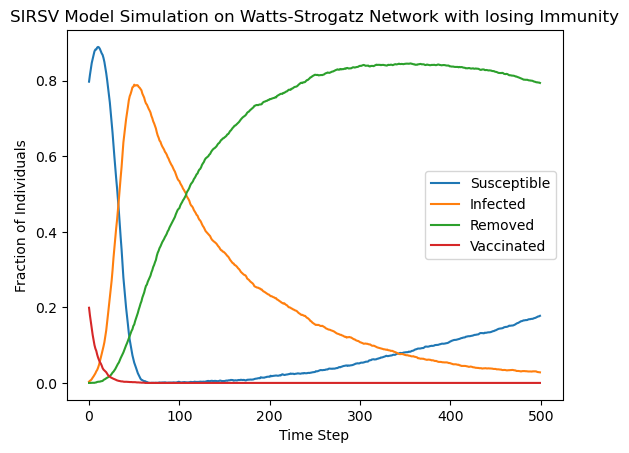

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to initialize the SIRSV model with random vaccination
def initialize_sirsv_model(network, initial_infected_node, vaccination_fraction):
    states = {node: 'S' for node in network.nodes()}  # All nodes are initially susceptible
    vaccinated_nodes = np.random.choice(list(network.nodes()), size=int(vaccination_fraction * len(network.nodes())), replace=False)
    for node in vaccinated_nodes:
        states[node] = 'V'  # Set the state of vaccinated nodes to 'V'
    states[initial_infected_node] = 'I'  # Set the initial infected node
    return states

# Function to simulate the SIRSV model with waning immunity
def sirsv_simulation(network, states, alpha, beta, gamma, delta, vaccination_fraction, immunity_loss_rate, duration):
    num_nodes = len(network.nodes())
    num_susceptible = []
    num_infected = []
    num_removed = []
    num_vaccinated = []

    for _ in range(duration):
        
        susceptible_count = sum(1 for node, state in states.items() if state == 'S')
        infected_count = sum(1 for node, state in states.items() if state == 'I')
        removed_count = sum(1 for node, state in states.items() if state == 'R')
        vaccinated_count = sum(1 for node, state in states.items() if state == 'V')

        # Store current counts
        num_susceptible.append(susceptible_count / num_nodes)
        num_infected.append(infected_count / num_nodes)
        num_removed.append(removed_count / num_nodes)
        num_vaccinated.append(vaccinated_count / num_nodes)

        new_states = states.copy()
        for node in network.nodes():
            if states[node] == 'S':
                num_neighbors_infected = sum(1 for neighbor in network.neighbors(node) if states[neighbor] == 'I')
                if np.random.random() < alpha * num_neighbors_infected:
                    new_states[node] = 'I'  # Susceptible becomes infected
            elif states[node] == 'I':
                if np.random.random() < beta:
                    new_states[node] = 'R'  # Infected becomes removed
            elif states[node] == 'R':
                if np.random.random() < delta:
                    new_states[node] = 'S'  # Removed becomes susceptible
            elif states[node] == 'V':
                if np.random.random() < immunity_loss_rate:
                    new_states[node] = 'S'  # Vaccinated loses immunity and becomes susceptible

        states = new_states
        seed+1

    return num_susceptible, num_infected, num_removed, num_vaccinated

# Parameters
N = 300  # Number of nodes
k = 4    # Each node is connected to k nearest neighbors in a ring topology
p_rewire = 0.05  # Probability of rewiring edges
alpha = 0.2  # Probability that a susceptible person becomes infected if one of the neighbors is infected
beta = 0.01  # Probability that an infected person becomes removed
gamma = 0.005  # Probability that an infected person becomes susceptible again
delta = 0.001  # Probability that a removed person becomes susceptible again
vaccination_fraction = 0.2  # Fraction of the population vaccinated initially
immunity_loss_rate = 0.1  # Probability that a vaccinated person loses immunity and becomes susceptible again
duration = 500  # Simulation duration
repetitions = 10  # Number of repetitions

# Initialize lists to store results
avg_susceptible = np.zeros(duration)
avg_infected = np.zeros(duration)
avg_removed = np.zeros(duration)
avg_vaccinated = np.zeros(duration)

# Repeat simulation for multiple runs
for _ in range(repetitions):
    # Generate Watts-Strogatz network
    network = nx.watts_strogatz_graph(N, k, p_rewire)

    # Initialize SIRSV model with random vaccination
    initial_infected_node = np.random.choice(network.nodes())
    states = initialize_sirsv_model(network, initial_infected_node, vaccination_fraction)

    # Simulate SIRSV model with waning immunity
    s, i, r, v = sirsv_simulation(network, states, alpha, beta, gamma, delta, vaccination_fraction, immunity_loss_rate, duration)

    # Aggregate results
    avg_susceptible += np.array(s)
    avg_infected += np.array(i)
    avg_removed += np.array(r)
    avg_vaccinated += np.array(v)

# Average over repetitions
avg_susceptible /= repetitions
avg_infected /= repetitions
avg_removed /= repetitions
avg_vaccinated /= repetitions

# Plotting
# Plotting
plt.plot(avg_susceptible, label='Susceptible')
plt.plot(avg_infected, label='Infected')
plt.plot(avg_removed, label='Removed')
plt.plot(avg_vaccinated, label='Vaccinated')
plt.xlabel('Time Step')
plt.ylabel('Fraction of Individuals')
plt.title('SIRSV Model Simulation on Watts-Strogatz Network with losing Immunity')
plt.legend()
plt.show()


# Explanation

The behaviour of the vaccination make sense. When 20% of population is vaccinated only 80% of populaton is susceptible. By the time, population is losing immunity with the rate of 0.1. Again 100% of poulation is susceptible and numbers of infected nodes also reach their peak value.  

# References

[1] https://stackoverflow.com/questions/65378617/sirs-model-with-agents-on-networkx 

[2]  Barabasi, A.-L., Network Science.